In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = pd.read_csv('movies.csv')

# (Graph) What was the runtime for each movie?

### To visualize the runtime for each movie, I created a simple bar chart (runtime on the y-axis and movie title on the x-axis) showing the distribution of runtimes.

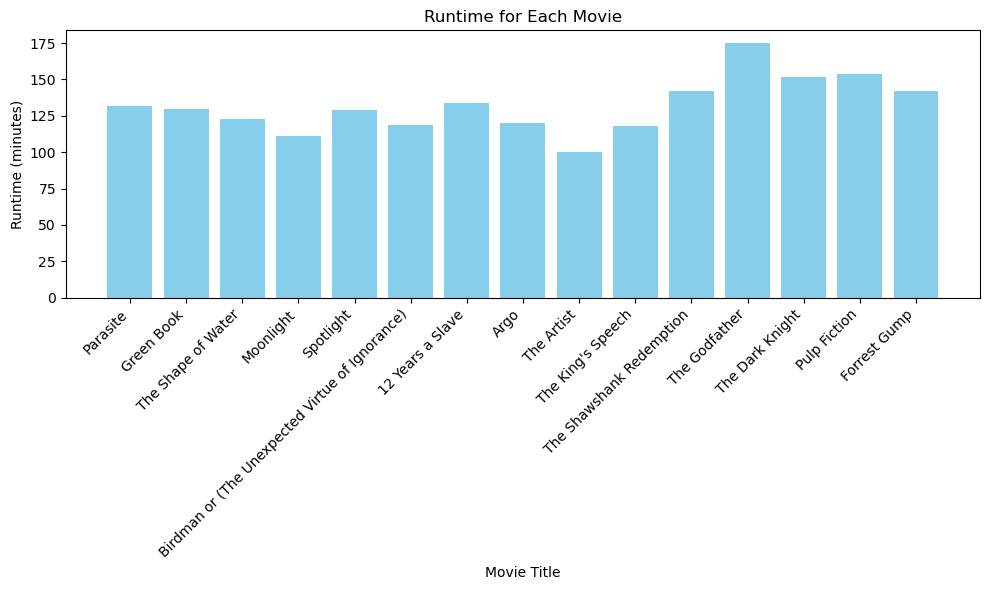

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(df['Movie Title'], df['Runtime'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Runtime (minutes)')
plt.title('Runtime for Each Movie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# What movie had the longest runtime?

### To find out which movie had the longest runtime, I used the idxmax() function in pandas to find the index of the row with the maximum value in the 'Runtime' column, and then used the index to access the corresponding movie title.

### 12 Years a Slave had the longest runtime at 134 minutes initially, but with new data The Godfather has the longest run time with 175 minutes.

In [42]:
max_index = df['Runtime'].idxmax()

longest_movie_title = df.loc[max_index, 'Movie Title']
longest_runtime = df.loc[max_index, 'Runtime']

print(f"The movie with the longest runtime is '{longest_movie_title}' with a runtime of {longest_runtime} minutes.")

The movie with the longest runtime is 'The Godfather' with a runtime of 175 minutes.


# Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

### To explore the relationship between the length of the movie (runtime) and the number of awards won, I created a scatter plot where the x-axis represents the movie runtime and the y-axis represents the number of awards won.

### A correlation coefficient of approximately 0.112 indicates a weak positive linear relationship between the two variables being analyzed, suggesting that there is a slight tendency for the two variables to increase together, but the relationship is not strong.

### Update: Data suggest a correlation coefficient of approximately -0.436 suggests a moderate negative linear relationship between the two variables.

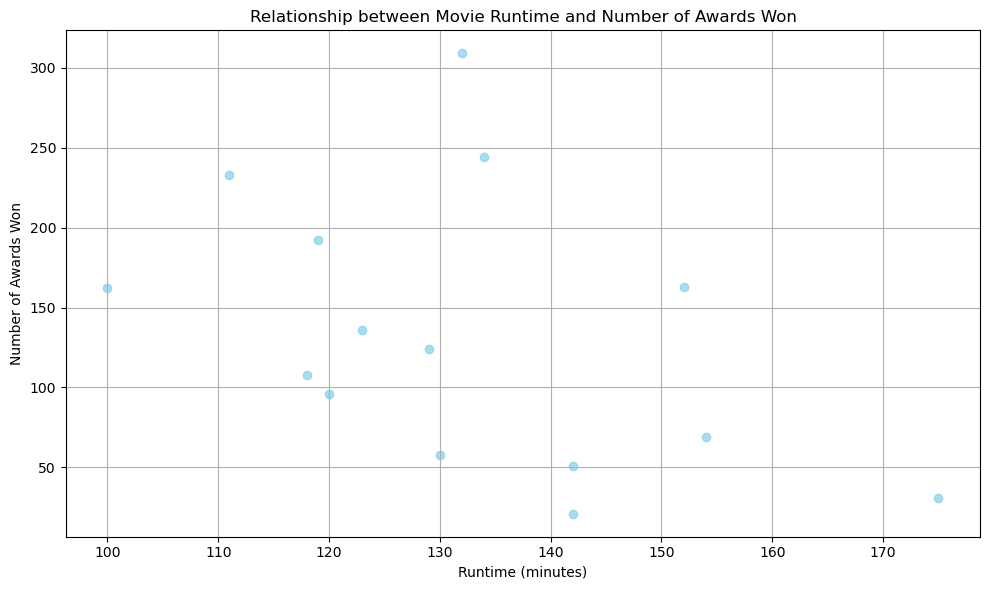

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Runtime'], df['Award Wins'], color='skyblue', alpha=0.7)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Awards Won')
plt.title('Relationship between Movie Runtime and Number of Awards Won')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
correlation = df['Runtime'].corr(df['Award Wins'], method='pearson')
print(f"Correlation coefficient between movie runtime and number of awards won: {correlation}")

Correlation coefficient between movie runtime and number of awards won: -0.4364146661839919


# (Graph) How many awards and nominations did each movie receive?

### To visualize the number of awards and nominations each movie received, I created a grouped bar chart.

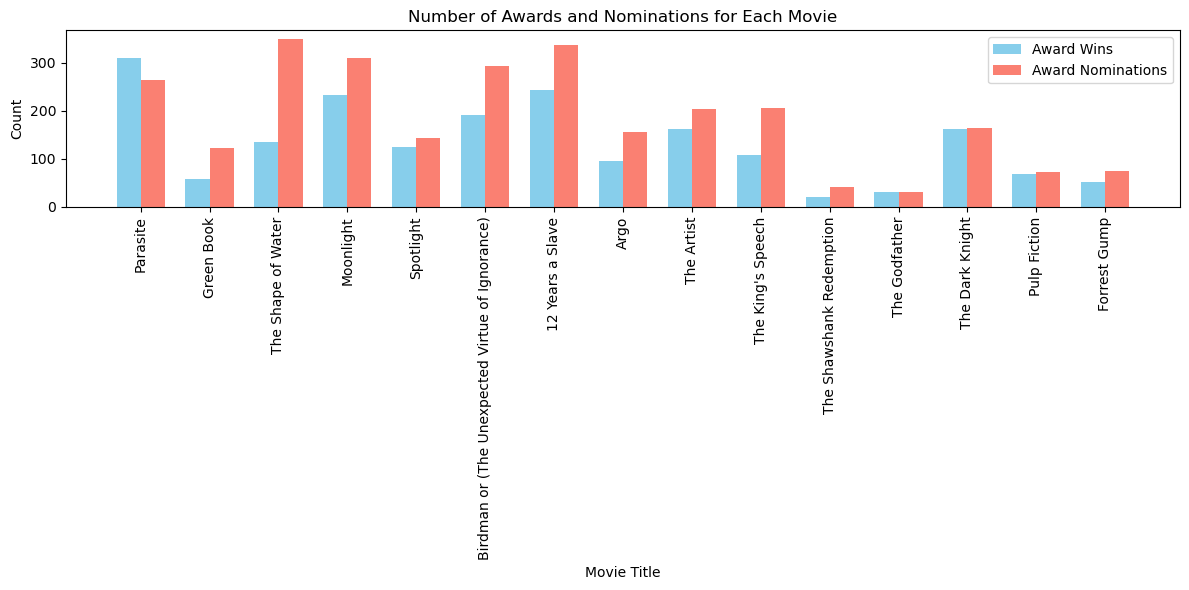

In [45]:
x = np.arange(len(df))

bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, df['Award Wins'], bar_width, color='skyblue', label='Award Wins')
plt.bar(x + bar_width/2, df['Award Nominations'], bar_width, color='salmon', label='Award Nominations')

plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.title('Number of Awards and Nominations for Each Movie')
plt.xticks(x, df['Movie Title'], rotation=90)
plt.legend()
plt.ylim(0)
plt.tight_layout()
plt.show()

# EXTRA CREDIT

# Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

### To determine if there is a relationship between the amount of box office earnings a movie had and the total number of nominations it received (which includes both award wins and award nominations), I calculated the correlation coefficient between the two variables.

### A correlation coefficient of approximately -0.565 suggests a moderate negative linear relationship between box office earnings and the total number of nominations a movie received.

### Update: Data suggests a very weak negative linear relationship between box office earnings and the total number of nominations a movie received.¶

In [46]:
df['Total Nominations'] = df['Award Wins'] + df['Award Nominations']

correlation = df['Box Office'].corr(df['Total Nominations'])

print("Correlation coefficient between box office earnings and total nominations:", correlation)

Correlation coefficient between box office earnings and total nominations: -0.25207225347396706


# Is there a relationship between box office earnings and movie runtimes?

### Similar approach to the previous question.

### A correlation coefficient of approximately 0.0838 suggests a very weak positive linear relationship between box office earnings and movie runtimes.

### Update: Data suggests a moderate positive linear relationship between box office earnings and movie runtimes.

In [47]:
correlation = df['Box Office'].corr(df['Runtime'])

print("Correlation coefficient between box office earnings and movie runtimes:", correlation)

Correlation coefficient between box office earnings and movie runtimes: 0.4261192521610816


# (Graph) How much did each movie earn at the box office?

### To visualize how much each movie earned at the box office, I created a bar plot showing the box office earnings for each movie. The x-axis display the movie titles, and the y-axis display the box office earnings.

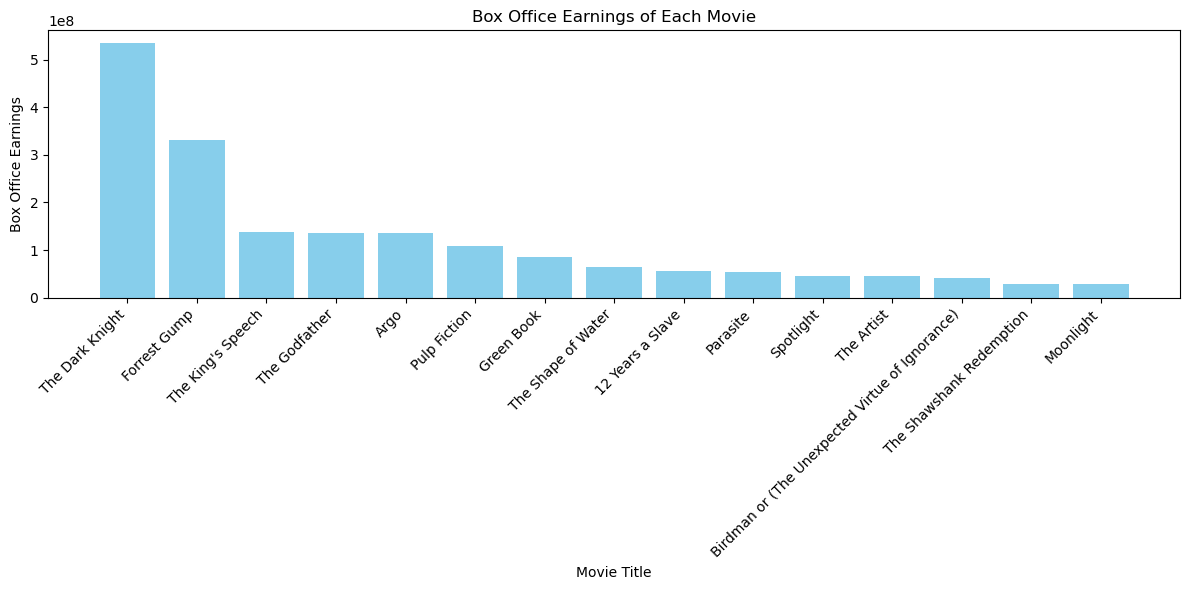

In [48]:
df_sorted = df.sort_values(by='Box Office', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Movie Title'], df_sorted['Box Office'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Box Office Earnings')
plt.title('Box Office Earnings of Each Movie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# (Graph) What is the total count of each genre present in the dataset? (How many times does fantasy, drama, adventure, etc. show up)

### To visualize the total count of each genre present in the dataset, I created a bar plot showing the frequency of each genre. The x-axis display the genre names, and the y-axis display the count of each genre.

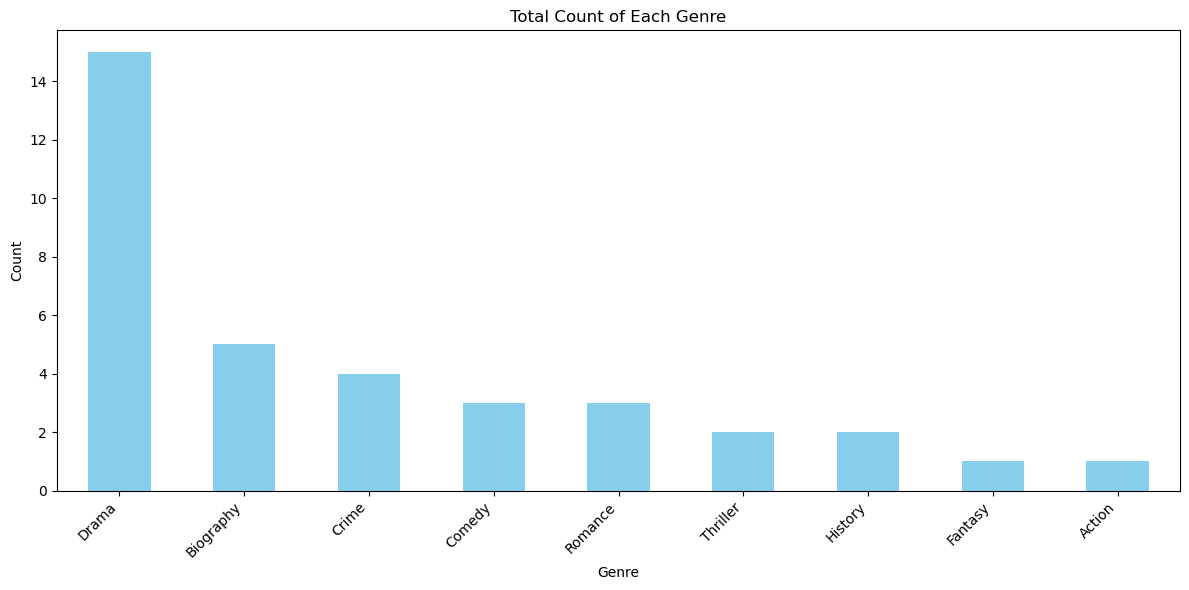

In [49]:
genres = df['Genre'].str.split(', ').explode()
genre_counts = genres.value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Total Count of Each Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()